## Activity: AI based dynamics classification tool, exploiting processing of stabilogram Features.
----
<font size = 4 > This repository is containing data analysis of sensor node attached to a dedicated mechanism shown in figure below for collecting postural sway data for the classification of the postural sway behaviour. </font>

----
### Explanation of the setup
Experimental surveys aimed to acquire the dataset have been performed by using the dedicated structure, shown in Fig. 1. This set-up allows for reproducing different dynamics, thus resembling the following movements: 

* **Stable behaviors (ST)**,
* **Antero-Posterior (AP)**, 
* **Medio-Lateral (ML) dynamics**,  
* **Unstable behaviors (UNST)**. 

The sensor node is located on the structure in a position corresponding to the user chest, where H1 is the distance between the sensor node and the bottom joint (on the floor), while H2 is the distance between the node and the belt joint. ML displacements are obtained by manually tilting the system around the belt joint, while APs are generated by exploiting tilting around the bottom joint. 

<font size=4> The sensor setup is depicted in the picture below.</font>

<center> <img src=./img/data-collection-setup.png width=300 height=600> </center>

### Data
<font size = 4 > Data contains extracted features from the accelerometer data sampled at 100Hz . Two features are extracted from the data namely Antero-Posterior Displacement (DAP) and Medio-Lateral displacement (DML).
Starting from three acceleration components, time evolutions of the Antero-Posterior and Medio-Lateral displacement (DAP and DML) have been estimated by the following relationships  
</font> 

$$ DAP = H_1{ A_z\over \sqrt{{A_y}^2+{A_x}^2}} $$
$$ DML = H_2{ A_x\over \sqrt{{A_y}^2+{A_z}^2}} $$
H<sub>1</sub> and H<sub>2</sub> are the distance between the sensor node and the bottom joint (on the floor) and the belt joint respectively.


The dataset is organized as follows:
* In each folder Case_x you can find the time evolution of [DAP DML] for several examples of Standing, AP, ML, Unstable dynamics, obtained by the above-described set-up. 
* Each case represents a different positioning of the sensor node (different heights H1 and H2).


 <font size=4>  <b>Quick Note</b> </font>
 
Plotting DAP against DML you can find the stabilogram for each dynamic, and then you can save as images to be used for training and testing AI classification tool.
If you prefer stabilograms centered around zero DAP-DML values, you have just to remove the mean value from time-series.

## Initial analysis of the data: Read, find minimum length etc.

In [ ]:

import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']
input_data = np.array([])
output_data = np.array([])
min_len = 1000000
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    temp_data = np.loadtxt(filename)
    len_data = len(temp_data)
    if(len_data < min_len):
        min_len = len_data
        min_file_name = filename
    if classes[0] in filename:
        stab_standing = temp_data
    if classes[1] in filename:
        stab_ap = temp_data
    if classes[2] in filename:
        stab_ml = temp_data
    if classes[3] in filename:
        stab_instabile = temp_data


print(min_len)
print(min_file_name)

## Read data and structure it in a numpy array
    Here in initial read we consider the minumum length of the data for each case to have equal length for all the cases.
    Second we consider both DAP and DML as different inputs for the AI model.
    In other trial we will consider DAP and DML as a single input for the AI model.


In [ ]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((2,min_len))
output_data = []
filenames = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    filenames.append(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0,0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1,1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2,2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3,3])
    # pd.concat([df, df_temp], axis=1)
    temp_data = np.transpose(temp_data)
    input_data = np.append(input_data, temp_data,axis=0)
input_data = np.delete(input_data, [0,1], axis=0)
print(f"Input data shape: {input_data.shape}")
print(f"Output data shape: {output_data.shape}")

## Plot Stabilograms - Scatter Plot

In [ ]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].scatter(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=12)
axs[0,0].set_xlabel('DAP', fontsize=12)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].scatter(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].scatter(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Plot Stabilograms - Line Plot

In [ ]:
# Plot 2x2 subplots
# %matplotlib

fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(stab_ap[:,0], stab_ap[:,1])
axs[0, 0].set_title('Stab_AP', fontsize=18)
axs[0,0].set_xlabel('DAP', fontsize=18)
axs[0,0].set_ylabel('DML', fontsize=18)
axs[0,0].tick_params(axis='both', labelsize=15)

axs[0, 1].plot(stab_instabile[:,0], stab_instabile[:,1], c='r')
axs[0, 1].set_title('Stab_Instabile',fontsize=18)
axs[0, 1].set_xlabel('DAP', fontsize=18)
axs[0, 1].set_ylabel('DML', fontsize=18)
axs[0, 1].tick_params(axis='both', labelsize=15)

axs[1, 0].plot(stab_ml[:,0], stab_ml[:,1], c='g')
axs[1, 0].set_title('Stab_ML', fontsize=18)
axs[1, 0].set_xlabel('DAP', fontsize=18)
axs[1, 0].set_ylabel('DML', fontsize=18)
axs[1, 0].tick_params(axis='both', labelsize=15)

axs[1, 1].plot(stab_standing[:,0], stab_standing[:,1], c='y')
axs[1, 1].set_title('Stab_standing',fontsize=18)
axs[1, 1].set_xlabel('DAP', fontsize=18)
axs[1, 1].set_ylabel('DML', fontsize=18)
axs[1, 1].tick_params(axis='both', labelsize=15)
plt.tight_layout()

## Seperataly Plot DAP-DML for each dynamic

In [ ]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(4, 2, figsize=(16,12), dpi=160)
f1=22
f2=20
f3=18
axs[0, 0].plot(stab_ap[:,0])
axs[0, 0].set_title('Antero-Posterior - DAP', fontsize=f1)
axs[0,0].set_xlabel('Sample Number', fontsize=f2)
axs[0,0].set_ylabel('DAP Value', fontsize=f2)
axs[0,0].tick_params(axis='both', labelsize=f3)

axs[0,1].plot(stab_ap[:,1])
axs[0,1].set_title('Antero-Posterior - DML',fontsize=f1)
axs[0,1].set_xlabel('Sample Number', fontsize=f2)
axs[0,1].set_ylabel('DML Value', fontsize=f2)
axs[0,1].tick_params(axis='both', labelsize=f3)

axs[1, 0].plot(stab_instabile[:,0], c='r')
axs[1, 0].set_title('Unstable - DAP',fontsize=f1)
axs[1,0].set_xlabel('Sample Number', fontsize=f2)
axs[1,0].set_ylabel('DAP Value', fontsize=f2)
axs[1,0].tick_params(axis='both', labelsize=f3)



axs[1,1].plot(stab_instabile[:,1], c='r')
axs[1,1].set_title('Unstable - DML',fontsize=f1)
axs[1,1].set_xlabel('Sample Number', fontsize=f2)
axs[1,1].set_ylabel('DML Value', fontsize=f2)
axs[1,1].tick_params(axis='both', labelsize=f3)



axs[2, 0].plot(stab_ml[:,0], c='g')
axs[2, 0].set_title('Medio-Lateral - DAP',fontsize=f1)
axs[2,0].set_xlabel('Sample Number', fontsize=f2)
axs[2,0].set_ylabel('DAP Value', fontsize=f2)
axs[2,0].tick_params(axis='both', labelsize=f3)



axs[2,1].plot(stab_ml[:,1], c='g')
axs[2,1].set_title('Medio-Lateral - DML',fontsize=f1)
axs[2,1].set_xlabel('Sample Number', fontsize=f2)
axs[2,1].set_ylabel('DML Value', fontsize=f2)
axs[2,1].tick_params(axis='both', labelsize=f3)


axs[3, 0].plot(stab_standing[:,0], c='y')
axs[3, 0].set_title('Stable-Standing - DAP',fontsize=f1)
axs[3,0].set_xlabel('Sample Number', fontsize=f2)
axs[3,0].set_ylabel('DAP Value', fontsize=f2)
axs[3,0].tick_params(axis='both', labelsize=f3)


axs[3,1].plot(stab_standing[:,1], c='y')
axs[3,1].set_title('Stable-Standing - DML',fontsize=f1)
axs[3,1].set_xlabel('Sample Number', fontsize=f2)
axs[3,1].set_ylabel('DML Value', fontsize=f2)
axs[3,1].tick_params(axis='both', labelsize=f3)
## Set horizontal space between subplots
# plt.subplots_adjust(hspace=0.1)
# ## Set vertical space between subplots
# plt.subplots_adjust(wspace=0.1)
plt.tight_layout()

## Concatenate data and plot 

In [ ]:
test_stab = np.concatenate((stab_ap[:,0],stab_ap[:,1]), axis=0)
test_ml = np.concatenate((stab_ml[:,0],stab_ml[:,1]), axis=0)
test_instabile = np.concatenate((stab_instabile[:,0],stab_instabile[:,1]), axis=0)
test_standing = np.concatenate((stab_standing[:,0],stab_standing[:,1]), axis=0)
# %matplotlib
fig, axs = plt.subplots(2, 2, figsize=(16,10))
axs[0, 0].plot(test_stab)
axs[0, 0].set_title('Stab_AP')
axs[0, 1].plot(test_instabile, c='r')
axs[0, 1].set_title('Stab_Instabile')
axs[1, 0].plot(test_ml, c='g')
axs[1, 0].set_title('Stab_ML')
axs[1, 1].plot(test_standing, c='cyan')
axs[1, 1].set_title('Stab_standing')
plt.tight_layout()

## Scatter Plot all dynamics in one plot

In [ ]:
# Plot 2x2 subplots
# %matplotlib
fig = plt.figure(figsize=(8,8), dpi=100)
plt.scatter(stab_standing[:,0], stab_standing[:,1], c='y')
plt.scatter(stab_ap[:,0], stab_ap[:,1])
plt.scatter(stab_ml[:,0], stab_ml[:,1], c='g')
plt.scatter(stab_instabile[:,0], stab_instabile[:,1], c='r')
plt.legend(classes, fontsize=14)
plt.title('All classes', fontsize=14)
plt.xlabel('DAP', fontsize=14)
plt.ylabel('DML', fontsize=14)
plt.show()

## Import libraries for training and select GPU

In [ ]:
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib

# Using GPU
import os
import scipy.io as scpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

## Structure data for training, test and validation
    Here the dataset is structured in way that both DAP and DML are considered as different inputs.
    This is the first method.

In [ ]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

## Try a simple dense model

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(450,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

### EVALUATE THE MODEL

In [ ]:
dense_model.evaluate(x_test, y_test, verbose=1)

## Try the CNN Model with 1D Convolution

In [ ]:
model = tf.keras.Sequential(name='conv_model_paper')
model.add(tf.keras.layers.InputLayer(input_shape=(450,1)))
model.add(tf.keras.layers.Conv1D(32,7))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
model.add(tf.keras.layers.Conv1D(48,5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=100, validation_data=(x_val,y_test), verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

## PYCARET - AUTO ML CLASSIFICATION TEST

In [ ]:
from pycaret.classification import *
s = setup(x_data, target = y_data)

In [ ]:
best = compare_models()

In [ ]:
evaluate_model(best)

## Let's Concatenate DAP and DML and try again

In [ ]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((1,min_len*2))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    concat_data = np.concatenate((temp_data[:,0],temp_data[:,1]), axis=0)
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, 0)
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, 1)
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, 2)
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, 3)
    concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
    input_data = np.append(input_data, concat_data,axis=0)
    input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

In [ ]:
import miun_utils as miun
SEED = 12312323
miun.use_gpu()
miun.fix_seed(SEED)
model = miun.dense_model((900,), 4, 12, 4)
x_train, x_val, x_test, y_train, y_val, y_test = miun.split_data(input_data, output_data, 0.15, 0.15, SEED)


In [ ]:
import torch
torch_model = miun.FCN(900, 4, 12, 4)
optimizer = torch.optim.Adam(torch_model.parameters(),lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()
files = []
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
input_data = torch.tensor(input_data, dtype=torch.float32)
output_data = torch.tensor(output_data, dtype=torch.float32)

for i in range(1000):
    optimizer.zero_grad()
    yh = torch_model(x_train)
    loss = loss_fn(yh, y_train)
    loss.backward()
    optimizer.step()


In [ ]:
epochs = 100
batch_size = 32
learning_rate = 1e-3
history = miun.train_dense_model(model, x_train, y_train, x_val, y_val, epochs, batch_size, learning_rate)

In [ ]:
miun.plot_history(history)

In [ ]:
classes = ['Stable-Standing','Stable_AP','Stable_ML','Instabile']
miun.plot_roc_curve(model, x_test, y_test, classes)

In [ ]:
miun.plot_confusion_matrix(model, x_test, y_test, classes)

In [ ]:
miun.get_performance_metrics(model,history, x_test, y_test)

In [ ]:
miun.get_sklearn_metrics(model, x_test, y_test)

## Train - Validation - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib
import os
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)

print(f" {len(x_train), len(x_test)}")
print(f" {len(y_train), len(y_test)}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_split=3,
                      n_estimators=10,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_classifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf_classifier.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
ax.set_title("Random Forest Classifier", fontsize=15)
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ex_classifier = ExtraTreesClassifier(
                      n_estimators=10,
                      random_state=0)

ex_classifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = ex_classifier.predict(x_test)
cm_et = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm_et,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
ax.set_title("Extra Trees Classifier", fontsize=15)
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


## PYCARET - AUTO ML CLASSIFICATION TEST

In [ ]:
from pycaret.classification import *
s = setup(x_data, target = y_data)

In [ ]:
best = compare_models(exclude=['catboost'])

In [ ]:
evaluate_model(best)

In [ ]:
## Try SVM Model
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', C=1, gamma=0.1)
svm_classifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = svm_classifier.predict(x_test)
cm_svc = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)
ax = plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
classes = ['Stable-Standing','Stable_AP','Stable_ML','Instabile']
labels = classes

sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=13)
ax.set_yticklabels(labels, fontsize=13)
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
ax.set_title("SVM Classifier", fontsize=15)
plt.tight_layout()
import sklearn.metrics as metrics
metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred,digits=4))
print(metrics.accuracy_score(y_test, y_pred))

### Prepare data for dense model training

In [ ]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_test), len(y_test)}")

## Try a simple dense model

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(900,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [ ]:
dense_model.evaluate(x_test,y_test)

In [ ]:
## Get number of FLOPS for the model using keras flops counter
from keras_flops import get_flops
flops = get_flops(dense_model)
print(flops)
## Try TF Profiler
import tensorflow as tf

In [ ]:
## Plot all confusion matrixes in the same figure
fig, ax = plt.subplots(2, 2, figsize=(16, 16), dpi=160)
ax[0, 0].set_title("Random Forest Classifier", fontsize=15)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax[0, 0], square=True)
ax[0, 0].set_xticklabels(labels, fontsize=10)
ax[0, 0].set_yticklabels(labels, fontsize=10)
ax[0, 0].set_xlabel("Predicted Label", fontsize=10)
ax[0, 0].set_ylabel("True Label", fontsize=10)
ax[0, 0].set_title("Random Forest Classifier", fontsize=15)

ax[0, 1].set_title("Extra Trees Classifier", fontsize=15)
sns.heatmap(cm_et,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax[0, 1], square=True)
ax[0, 1].set_xticklabels(labels, fontsize=10)
ax[0, 1].set_yticklabels(labels, fontsize=10)
ax[0, 1].set_xlabel("Predicted Label", fontsize=10)
ax[0, 1].set_ylabel("True Label", fontsize=10)
ax[0, 1].set_title("Extra Trees Classifier", fontsize=15)

ax[1, 0].set_title("SVM Classifier", fontsize=15)
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax[1, 0], square=True)
ax[1, 0].set_xticklabels(labels, fontsize=10)
ax[1, 0].set_yticklabels(labels, fontsize=10)
ax[1, 0].set_xlabel("Predicted Label", fontsize=10)
ax[1, 0].set_ylabel("True Label", fontsize=10)
ax[1, 0].set_title("SVM Classifier", fontsize=15)

x_to_test = np.concatenate((x_val, x_test))
y_to_test = np.concatenate((y_val, y_test))
y_pred_dnn = dense_model.predict(x_to_test)
y_pred_dnn = np.argmax(y_pred_dnn, axis=1)
cm_dnn = confusion_matrix(y_to_test, y_pred_dnn)
ax[1, 1].set_title("Dense Neural Network", fontsize=15)
sns.heatmap(cm_dnn,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax[1, 1], square=True)
ax[1, 1].set_xticklabels(labels, fontsize=10)
ax[1, 1].set_yticklabels(labels, fontsize=10)
ax[1, 1].set_xlabel("Predicted Label", fontsize=10)
ax[1, 1].set_ylabel("True Label", fontsize=10)
ax[1, 1].set_title("Dense Neural Network", fontsize=15)


In [ ]:
## Write the same dense model using pytorch
import torch
import torch.nn as nn
## fix the random seed
torch.manual_seed(99)

class DenseModel(nn.Module):
    def __init__(self):
        super(DenseModel, self).__init__()
        self.fc1 = nn.Linear(900, 12)
        self.fc2 = nn.Linear(12, 8)
        self.fc3 = nn.Linear(8, 4)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

dense_model = DenseModel()
print(dense_model)
### Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dense_model.parameters(), lr=0.001)



In [ ]:
### Define the training and validation function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs,device):
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
                       
            loss.backward()
            optimizer.step()
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects.double() / len(train_loader.dataset)
        train_loss.append(epoch_loss)
        train_acc.append(epoch_acc)
        model.eval()
        running_loss = 0.0
        running_corrects = 0
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
        epoch_loss = running_loss / len(val_loader.dataset)
        epoch_acc = running_corrects.double() / len(val_loader.dataset)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)
        print('Epoch {}/{} - Train Loss: {:.4f} - Train Acc: {:.4f} - Val Loss: {:.4f} - Val Acc: {:.4f}'.format(epoch+1, num_epochs, train_loss[-1], train_acc[-1], val_loss[-1], val_acc[-1]))
    train_acc = [t.cpu().numpy() for t in train_acc]
    val_acc = [t.cpu().numpy() for t in val_acc]
    return train_loss, train_acc, val_loss, val_acc

### Define the test function
def test_model(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    epoch_loss = running_loss / len(test_loader.dataset)
    epoch_acc = running_corrects.double() / len(test_loader.dataset)
    print('Test Loss: {:.4f} - Test Acc: {:.4f}'.format(epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc

### Train the model
### Create the data loaders


In [ ]:
# Convert the data to tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

In [ ]:
## Fix the random seed
torch.manual_seed(99)
dense_model = DenseModel()
print(dense_model)
### Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dense_model.parameters(), lr=0.001)
train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
val_dataset = torch.utils.data.TensorDataset(x_val, y_val)
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)
### Create the data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dense_model.to(device)
train_loss, train_acc, val_loss, val_acc = train_model(dense_model, train_loader, val_loader, criterion, optimizer, 100, device)


In [ ]:
## Plot the loss and accuracy of a torch model training
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5),dpi=80)
## show the loss and accuracy in two subplots
ax = fig.add_subplot(1,2,1)
ax.plot(train_loss, linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.plot(val_loss, linewidth=2)
plt.legend(['training_loss', 'validation_loss'], bbox_to_anchor=(1, 1), loc='upper right', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,2,2)
#train_acc = [t.cpu().numpy() for t in train_acc]
#val_acc = [t.cpu().numpy() for t in val_acc]
ax.plot(train_acc, linewidth=2)
ax.plot(val_acc, linewidth=2)
plt.legend(['training_accuracy', 'validation_accuracy'],  loc='lower right', fontsize=14)
ax.grid(True)
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Try a convolutional model

In [ ]:
model = tf.keras.Sequential(name='conv_model_paper')
model.add(tf.keras.layers.Reshape((900,1,1),name='Reshape', input_shape=(900,)))
model.add(tf.keras.layers.Conv2D(4,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=4, padding='same'))
model.add(tf.keras.layers.Conv2D(4,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=4, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=200, validation_data=(x_val,y_val), verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

In [ ]:
model.evaluate(x_test, y_test)

### Convert it to TF Lite model

In [ ]:
# dense_model = model
float_converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
float_tflite_model = float_converter.convert()
tflite_model_file = pathlib.Path('dense_model_30.tflite')
tflite_model_file.write_bytes(float_tflite_model)

In [ ]:
# Import the standard Python packages used by the examples
import os
import urllib
import shutil
import tempfile

# Import the necessary MLTK APIs
from mltk.core import profile_model
from mltk.utils.commander import query_platform
tflite_path = './dense_model_30.tflite'

# Profile the tflite model using the "basic simulator"
# NOTE: Update tflite_path to point to your model if necessary
profiling_results = profile_model(tflite_path)

# Print the profiling results
print(profiling_results)

### Convert it to C++ model

In [ ]:
!xxd -i dense_model_30.tflite > dense_model_30.cc

### Quantize the model and save as TFLite

In [ ]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_train).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]
converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
tflite_model_quant = converter.convert()

tflite_model_file = pathlib.Path('conv_model_quantized.tflite')
tflite_model_file.write_bytes(tflite_model_quant)

### Convert it to C++ CODE

In [ ]:
!xxd -i conv_model_quantized.tflite > conv_model_quantized.cc

### Run TF Lite Model

In [ ]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, indices):
  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test[index]
    test_data=np.expand_dims(test_data, axis=0)
    test_labels = y_test[index]

    interpreter.set_tensor(input_details["index"],test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    print(output[0])
    print(output[1])
    print(output[2])
    predictions = output.argmax()

  return predictions

In [ ]:
import matplotlib.pylab as plt
tflite_model_file = 'dense_model.tflite'
# Change this to test a different image
indice = 333

## Helper function to test the models on one image
def test_model(tflite_file, indice, model_type):

  predictions = run_tflite_model(tflite_file, [indice])

  print(f" Model \n True:{y_test[indice]}, Predicted:{predictions}")
  
test_model(tflite_model_file, indice, model_type="Float")

### Evaluate the quantized model

In [ ]:
import numpy as np

def run_tflite_model_for_eval(interpreter, indices):
  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = 0
  for i, index in enumerate(indices):
    test_data = x_test[index]
    test_data=np.expand_dims(test_data, axis=0)

    interpreter.set_tensor(input_details["index"], test_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]
    predictions = output.argmax()
  return predictions
  
def evaluate_model(interpreter):
  output_predictions =[]
  for i in range(len(x_test)):
    output_predictions.append(run_tflite_model_for_eval(interpreter,[i]))
  output_predictions = np.array(output_predictions)
  accuracy = (output_predictions == y_test).mean()
  return accuracy

In [ ]:
interpreter = tf.lite.Interpreter(model_path='dense_model_quantized.tflite')
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Optimized dense_model TFLite test_accuracy:', test_accuracy)

### Try Case based training and testing split

In [ ]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = np.zeros((1,min_len*2))
test_x = np.zeros((1,min_len*2))
test_y = []
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    concat_data = np.concatenate((temp_data[:,0],temp_data[:,1]), axis=0)
    if "Case_4" in filename:
        concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
        test_x = np.append(test_x, concat_data,axis=0)
        test_x = np.float32(test_x)
        if classes[0] in filename:
            test_y.append(0)
        if classes[1] in filename:
            test_y.append(1)
        if classes[2] in filename:
            test_y.append(2)
        if classes[3] in filename:
            test_y.append(3)
        continue

    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, 0)
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, 1)
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, 2)
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, 3)
    concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
    input_data = np.append(input_data, concat_data,axis=0)
    input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
test_x = np.delete(test_x, 0, axis=0)
test_y = np.array(test_y)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")
print(f"Test data shape   : {test_x.shape}")
print(f"Test labels shape : {test_y.shape}")

### Split data into train, test and validation

In [ ]:
## Split the data into train and test
from sklearn.model_selection import train_test_split
x_train = input_data
y_train = output_data
# x_train, x_test_to_use, y_train, y_test_to_use = train_test_split(x_train, y_train, test_size=0.125)
# test_x = np.concatenate((x_test_to_use, test_x), axis=0)
# test_y = np.concatenate((y_test_to_use, test_y), axis=0)

x_val, x_test, y_val, y_test = train_test_split(test_x, test_y, test_size=0.5)
print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_test), len(y_test)}")

### Test dense model with case based split

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(900,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [ ]:
dense_model.evaluate(x_test, y_test, verbose=1)

## MLTK Library for profiling the tflite models.
    It is really useful for calculating number of operations, required memory, CPU cycle etc.

In [ ]:
# Import the standard Python packages used by the examples
import os
import urllib
import shutil
import tempfile

# Import the necessary MLTK APIs
from mltk.core import profile_model
from mltk.utils.commander import query_platform


### Profile Dense Model

In [ ]:
tflite_path = './dense_model_30.tflite'

# Profile the tflite model using the "basic simulator"
# NOTE: Update tflite_path to point to your model if necessary
profiling_results = profile_model(tflite_path)

# Print the profiling results
print(profiling_results)

### Quantized model profiling

In [ ]:
tflite_path = './dense_model_quantized.tflite'

# Profile the tflite model using the "basic simulator"
# NOTE: Update tflite_path to point to your model if necessary
profiling_results = profile_model(tflite_path)

# Print the profiling results
print(profiling_results)

## Let's Try Input as 2 vector input : Corresponding 1st row as DAP and 2nd ROW as DML

In [ ]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = []
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3])
    temp_data = np.transpose(temp_data)
    input_data.append(temp_data)
input_data = np.array(input_data)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

### Train, test and validation split

In [ ]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

### Dense Model with 2 vector DAP & DML  inputs

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Reshape((30,30),input_shape=(2,450)),
    tf.keras.layers.Dense(12, activation='relu',input_shape=(30,30)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [ ]:
dense_model.evaluate(x_test,y_test,verbose=1)

### PYCARET - AUTO ML CLASSIFICATION TEST

In [ ]:
from pycaret.classification import *
x_data = x_data.reshape(x_data.shape[0], x_data.shape[1]*x_data.shape[2])
s = setup(x_data, target = y_data)

In [ ]:
best = compare_models()

## Case based split for 2 vector input

In [ ]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 450
input_data = []
output_data = []
test_x = []
test_y = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    temp_data = temp_data[:min_len]
    if "Case_3" in filename:
        test_x.append(np.transpose(temp_data))
        if classes[0] in filename:
            test_y.append(0)
        if classes[1] in filename:
            test_y.append(1)
        if classes[2] in filename:
            test_y.append(2)
        if classes[3] in filename:
            test_y.append(3)
        continue
    if classes[0] in filename:
        stab_standing = temp_data
        output_data = np.append(output_data, [0])
    if classes[1] in filename:
        stab_ap = temp_data
        output_data = np.append(output_data, [1])
    if classes[2] in filename:
        stab_ml = temp_data
        output_data = np.append(output_data, [2])
    if classes[3] in filename:
        stab_instabile = temp_data
        output_data = np.append(output_data, [3])
    temp_data = np.transpose(temp_data)
    input_data.append(temp_data)
test_x = np.array(test_x)
test_y = np.array(test_y, dtype=int)
input_data = np.array(input_data)
print(f"Input data shape  : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")
print(f"Test data shape   : {test_x.shape}")
print(f"Test label shape  : {test_y.shape}")

### Split data into train, test and validation

In [ ]:
## Split the data into train and test
from sklearn.model_selection import train_test_split
x_train = input_data
y_train = output_data
x_val, x_test, y_val, y_test = train_test_split(test_x, test_y, test_size=0.5)
print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_test), len(y_test)}")

### Dense Model with 2 vector DAP & DML  inputs - Case based split

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,450)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [ ]:
dense_model.evaluate(x_test, y_test)

### Try same data with CNN model

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 64

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))
model = tf.keras.Sequential(name='cnn_model')
model.add(tf.keras.layers.InputLayer(input_shape=(2,450)))
model.add(tf.keras.layers.Conv1D(8,2, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv1D(4,2, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(12))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=100, validation_data=val_dataset, verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

In [ ]:
model.evaluate(x_test, y_test)

## Let's try SKLEARN Random Forest and Emlearn library for deployment

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=5, max_depth=10, random_state=0)
# x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
estimator.fit(x_train, y_train)
estimator.score(x_test, y_test)

### Convert it to header file using emlearn library

In [ ]:
import emlearn
cmodel = emlearn.convert(estimator, method='inline')
cmodel.save(file='my-test.h')

In [ ]:
import emlearn
print(emlearn.includedir)

In [ ]:
print(x_test[0])

In [ ]:
print(y_test[0])

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=5,random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

In [ ]:
cmodel=0

In [ ]:
import emlearn
cmodel = emlearn.convert(clf, method='inline')
cmodel.save(file='extra_tree_clf_postural_sway.h')

## Let's try to decrease prediction window from 4.5 seconds to 1 second

In [2]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import numpy as np
import pathlib

# Using GPU
import os
import scipy.io as scpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']
def read_data(len_min):
    min_len = len_min
    input_data = np.zeros((1,min_len*2))
    output_data = []
    min_file_name = ''
    filenames = []
    for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
        # print(filename)
        temp_data = np.loadtxt(filename)
        filenames.append(filename)
        for i in range(int(temp_data.shape[0]/min_len)):
            concat_data = temp_data[min_len*i:min_len*(i+1)]
            temp2_data = temp_data[min_len*(i+1):min_len*(i+2)]
            concat_data = np.concatenate((concat_data[:,0],concat_data[:,1]), axis=0)
            if classes[0] in filename:
                stab_standing = temp2_data
                output_data = np.append(output_data, 0)
            if classes[1] in filename:
                stab_ap = temp2_data
                output_data = np.append(output_data, 1)
            if classes[2] in filename:
                stab_ml = temp2_data
                output_data = np.append(output_data, 2)
            if classes[3] in filename:
                stab_instabile = temp2_data
                output_data = np.append(output_data, 3)
            concat_data = np.reshape(concat_data, (1,concat_data.shape[0]))    
            input_data = np.append(input_data, concat_data,axis=0)
            input_data = np.float32(input_data)
    input_data = np.delete(input_data, 0, axis=0)
    return input_data, output_data

1 Physical GPUs, 1 Logical GPUs


### Train, test and validation split

In [3]:
x_data_100,y_data_100 = read_data(100)
x_data_200,y_data_200 = read_data(200)
x_data_300,y_data_300 = read_data(300)
x_data_450,y_data_450 = read_data(450)

x_data = x_data_100
y_data = y_data_100
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

 (3382, 725, 725)
 (3382, 725, 725)


0.9846153846153847
              precision    recall  f1-score   support

         0.0     1.0000    0.9683    0.9839        63
         1.0     1.0000    1.0000    1.0000        40
         2.0     0.9286    1.0000    0.9630        39
         3.0     1.0000    0.9811    0.9905        53

    accuracy                         0.9846       195
   macro avg     0.9821    0.9873    0.9843       195
weighted avg     0.9857    0.9846    0.9848       195



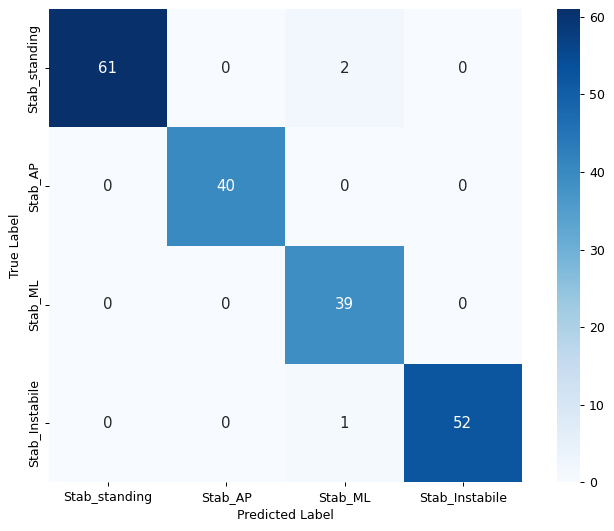

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_classifier.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


In [ ]:
def add_noise(x, noise_factor):
    x = x + noise_factor * tf.random.normal(shape=x.shape)
    return x
noises=[]
losses=[]
accuracies=[]
for i in range(20):
    noisy_x_train = add_noise(x_train, i/100)
    noisy_x_test = add_noise(x_test, i/100)
    rf_classifier.fit(noisy_x_train, y_train)
    y_pred = rf_classifier.predict(noisy_x_test)
    noises.append(i/100)
    losses.append(metrics.hamming_loss(y_test, y_pred))
    accuracies.append(metrics.accuracy_score(y_test, y_pred))
plt.figure(figsize=(8,6), dpi=90)
plt.plot(noises, losses, '-*', label='loss')
plt.plot(noises, accuracies, '-*', label='accuracy')
plt.legend()
plt.show()

rf_losses = losses
rf_accuracies = accuracies

In [ ]:
print(classes)

### Try a dense model for 1x200 input size : DAP and DML concatenated

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                2412      
                                                                 
 dense_1 (Dense)             (None, 4)                 52        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
Total params: 2,484
Trainable params: 2,484
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2023-03-23 13:42:04.220271: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


106/106 [==============================] - 1s 2ms/step - loss: 1.2898 - accuracy: 0.3664 - val_loss: 1.2029 - val_accuracy: 0.4745
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 1.1382 - accuracy: 0.5112 - val_loss: 1.0531 - val_accuracy: 0.5972
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 1.0018 - accuracy: 0.6020 - val_loss: 0.9223 - val_accuracy: 0.6593
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.8835 - accuracy: 0.6523 - val_loss: 0.8135 - val_accuracy: 0.6924
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.7810 - accuracy: 0.6931 - val_loss: 0.7209 - val_accuracy: 0.7352
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.7590 - val_loss: 0.6343 - val_accuracy: 0.7959
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.8356 - val_loss: 0.5527 - val_accuracy: 0.8497
Epoch 8/100

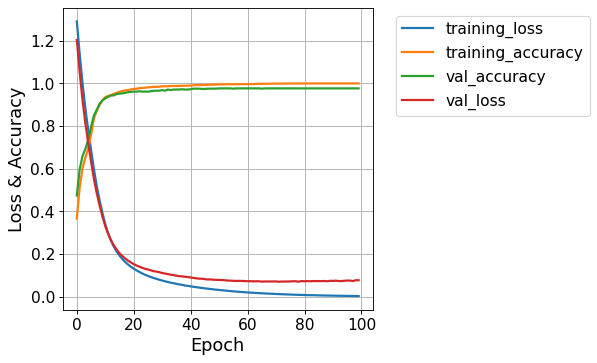

In [4]:
# %matplotlib
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
min_len = 100
# ADD NOISE TO DATA
x_train = x_train + 0.05 * tf.random.normal(shape=x_train.shape)
x_val = x_val + 0.05 * tf.random.normal(shape=x_val.shape)
x_test = x_test + 0.05 * tf.random.normal(shape=x_test.shape)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model_100 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(min_len*2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model_100.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model_100.summary()              

history_100=dense_model_100.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history_100.history['loss'], linewidth=2)
ax.plot(history_100.history['accuracy'],linewidth=2)
ax.plot(history_100.history['val_accuracy'],linewidth=2)
ax.plot(history_100.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history_100.history['accuracy'][-1]}")
print(f"Training Loss: {history_100.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history_100.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history_100.history['val_loss'][-1]}")

plt.show()

In [66]:
dense_model.evaluate(x_test, y_test)

23/23 [==============================] - 0s 861us/step - loss: 0.0521 - accuracy: 0.9903


[0.05211128666996956, 0.9903448224067688]

In [29]:
x_data = x_data_200
y_data = y_data_200
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
min_len = 200
## ADD NOISE TO DATA
# x_train = x_train + 0.1 * tf.random.normal(shape=x_train.shape)
# x_val = x_val + 0.1 * tf.random.normal(shape=x_val.shape)
# x_test = x_test + 0.1 * tf.random.normal(shape=x_test.shape)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model_200 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(min_len*2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model_200.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model_200.summary()              

history_200=dense_model_200.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history_200.history['loss'], linewidth=2)
ax.plot(history_200.history['accuracy'],linewidth=2)
ax.plot(history_200.history['val_accuracy'],linewidth=2)
ax.plot(history_200.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history_200.history['accuracy'][-1]}")
print(f"Training Loss: {history_200.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history_200.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history_200.history['val_loss'][-1]}")

plt.show()

 (1624, 348, 349)
 (1624, 348, 349)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                4812      
                                                                 
 dense_7 (Dense)             (None, 4)                 52        
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
Total params: 4,884
Trainable params: 4,884
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
51/51 [==============================] - 1s 7ms/step - loss: 1.3070 - accuracy: 0.4341 - val_loss: 1.2245 - val_accuracy: 0.4914
Epoch 2/100
51/51 [==============================] - 0s 4ms/step - loss: 1.1531 - accuracy: 0.5776 - val_loss: 1.1206 - val_accuracy: 0.543

In [30]:
x_data = x_data_300
y_data = y_data_300
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
min_len = 300
## ADD NOISE TO DATA
# x_train = x_train + 0.1 * tf.random.normal(shape=x_train.shape)
# x_val = x_val + 0.1 * tf.random.normal(shape=x_val.shape)
# x_test = x_test + 0.1 * tf.random.normal(shape=x_test.shape)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model_300 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(min_len*2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model_300.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model_300.summary()              

history_300=dense_model_300.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history_300.history['loss'], linewidth=2)
ax.plot(history_300.history['accuracy'],linewidth=2)
ax.plot(history_300.history['val_accuracy'],linewidth=2)
ax.plot(history_300.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history_300.history['accuracy'][-1]}")
print(f"Training Loss: {history_300.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history_300.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history_300.history['val_loss'][-1]}")

plt.show()

 (907, 194, 195)
 (907, 194, 195)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                7212      
                                                                 
 dense_10 (Dense)            (None, 4)                 52        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
Total params: 7,284
Trainable params: 7,284
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 1s 11ms/step - loss: 1.3353 - accuracy: 0.3164 - val_loss: 1.2582 - val_accuracy: 0.5155
Epoch 2/100
29/29 [==============================] - 0s 8ms/step - loss: 1.2191 - accuracy: 0.5557 - val_loss: 1.1643 - val_accuracy: 0.5155

In [41]:
print(history_450.history['val_accuracy'][-1])

0.9066666960716248


 (700, 150, 150)
 (700, 150, 150)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                10812     
                                                                 
 dense_4 (Dense)             (None, 4)                 52        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
Total params: 10,884
Trainable params: 10,884
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
22/22 [==============================] - 1s 4ms/step - loss: 1.2988 - accuracy: 0.4129 - val_loss: 1.2430 - val_accuracy: 0.5200
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 1.1742 - accuracy: 0.5571 - val_loss: 1.1571 - val_accuracy: 0.540

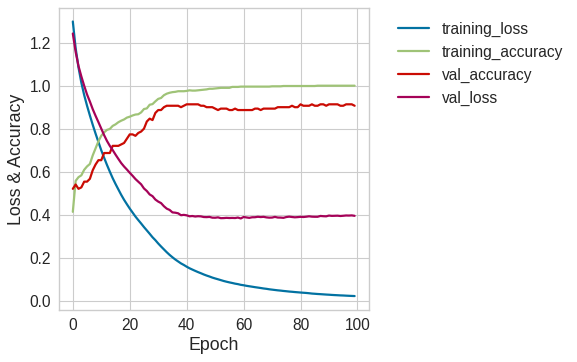

In [9]:
x_data = x_data_450
y_data = y_data_450
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
min_len = 450
## ADD NOISE TO DATA
# x_train = x_train + 0.1 * tf.random.normal(shape=x_train.shape)
# x_val = x_val + 0.1 * tf.random.normal(shape=x_val.shape)
# x_test = x_test + 0.1 * tf.random.normal(shape=x_test.shape)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model_450 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(min_len*2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model_450.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model_450.summary()              

history_450=dense_model_450.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history_450.history['loss'], linewidth=2)
ax.plot(history_450.history['accuracy'],linewidth=2)
ax.plot(history_450.history['val_accuracy'],linewidth=2)
ax.plot(history_450.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history_450.history['accuracy'][-1]}")
print(f"Training Loss: {history_450.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history_450.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history_450.history['val_loss'][-1]}")

plt.show()

In [35]:
## Plot all accuracies of the models
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6),dpi=160)
ax = fig.add_subplot(111)
ax.plot(history_100.history['val_accuracy'], linewidth=2)
ax.plot(history_200.history['val_accuracy'],linewidth=2)
ax.plot(history_300.history['val_accuracy'],linewidth=2)
ax.plot(history_450.history['val_accuracy'],linewidth=2)
ax.grid(False)
ax.set_ylabel('Validation Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
ax.legend(title = 'Input Sizes',labels=['1x200', '1x400', '1x600', '1x900'], loc='best', fontsize=14)
ax.set_title('Validation Accuracy of ANN Models with Different Input Sizes', fontsize=16)

C:\Users\101\AppData\Local\Temp\ipykernel_7968\115991983.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
C:\Users\101\AppData\Local\Temp\ipykernel_7968\115991983.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


Text(0.5, 1.0, 'Validation Accuracy of ANN Models with Different Input Sizes')

In [39]:
# dense_model = model
float_converter = tf.lite.TFLiteConverter.from_keras_model(dense_model)
float_tflite_model = float_converter.convert()
tflite_model_file = pathlib.Path('dense_model_450.tflite')
tflite_model_file.write_bytes(float_tflite_model)
!xxd -i dense_model_450.tflite > dense_model_450.cc

INFO:tensorflow:Assets written to: /tmp/tmpx0jxn7uk/assets


INFO:tensorflow:Assets written to: /tmp/tmpx0jxn7uk/assets
2023-03-15 12:52:24.315720: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-03-15 12:52:24.334525: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmpx0jxn7uk
2023-03-15 12:52:24.338940: I tensorflow/cc/saved_model/loader.cc:305] SavedModel load for tags { serve }; Status: success: OK. Took 25578 microseconds.


In [40]:
# print one test sample
x_test[0]

array([ 0.14587063,  0.0196022 ,  0.01225869,  0.00122344, -0.00611754,
       -0.02083423, -0.02942259, -0.03543912, -0.04035817, -0.03794166,
       -0.0428652 , -0.05635885, -0.0623339 , -0.06972516, -0.07216391,
       -0.07072262, -0.08185159, -0.08340297, -0.07934257, -0.0759264 ,
       -0.07448032, -0.08291282, -0.08549756, -0.08454198, -0.09030624,
       -0.10283573, -0.10633429, -0.11743582, -0.12478364, -0.12306897,
       -0.12344556, -0.12623557, -0.12087791, -0.11587588, -0.10996755,
       -0.10617546, -0.10123241, -0.10498412, -0.09736755, -0.10264769,
       -0.10731568, -0.11604307, -0.11730745, -0.12124096, -0.12589717,
       -0.13134763, -0.13494852, -0.13562664, -0.12559856, -0.12462507,
       -0.10385423, -0.09894199, -0.09724009, -0.09518766, -0.10622277,
       -0.10986308, -0.10741349, -0.10264769, -0.09672197, -0.09295689,
       -0.08685064, -0.08072572, -0.07574642, -0.0672074 , -0.05976371,
       -0.05496272, -0.05603728, -0.05259785, -0.05736159, -0.05

### Try a Random Forest model for 100 samples

In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=10, max_depth=20)
estimator.fit(x_train, y_train)
estimator.score(x_test, y_test)

In [ ]:
# Plot 2x2 subplots
# %matplotlib
# %matplotlib
fig, axs = plt.subplots(4, 2, figsize=(16,12))
stab_ap_index = np.where(y_test == 0)
stab_instabile_index = np.where(y_test == 1)
stab_ml_index = np.where(y_test == 2)
stab_standing_index = np.where(y_test == 3)
stab_ap = x_test[stab_ap_index]
stab_instabile = x_test[stab_instabile_index]
stab_ml = x_test[stab_ml_index]
stab_standing = x_test[stab_standing_index]

axs[0, 0].plot(stab_ap[0,0:100])
axs[0, 0].set_title('Stab_AP - DAP')

axs[0,1].plot(stab_ap[0,100:200])
axs[0,1].set_title('Stab_AP - DML')

axs[1, 0].plot(stab_instabile[0,0:100], c='r')
axs[1, 0].set_title('Stab_Instabile - DAP')

axs[1,1].plot(stab_instabile[0,100:200], c='r')
axs[1,1].set_title('Stab_Instabile - DML')

axs[2, 0].plot(stab_ml[0,0:100], c='g')
axs[2, 0].set_title('Stab_ML - DAP')

axs[2,1].plot(stab_ml[0,100:200], c='g')
axs[2,1].set_title('Stab_ML - DML')

axs[3, 0].plot(stab_standing[0,0:100], c='y')
axs[3, 0].set_title('Stab_standing - DAP')

axs[3,1].plot(stab_standing[0,100:200], c='y')
axs[3,1].set_title('Stab_standing - DML')
plt.tight_layout()

### PYCARET - AUTO ML CLASSIFICATION TEST Input Different

In [10]:
from pycaret.classification import *
s = setup(x_data, target = y_data, verbose=1)

,Description,Value
0,Session id,3079
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(1000, 901)"
4,Transformed data shape,"(1000, 901)"
5,Transformed train set shape,"(699, 901)"
6,Transformed test set shape,"(301, 901)"
7,Numeric features,900
8,Preprocess,True
9,Imputation type,simple


In [11]:
best = compare_models(exclude=['catboost','lightgbm'],verbose=1)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:50:52
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9971,0.9995,0.9971,0.9973,0.9971,0.9962,0.9962,0.0200
rf,Random Forest Classifier,0.9957,1.0000,0.9957,0.9959,0.9957,0.9943,0.9944,0.0550
et,Extra Trees Classifier,0.9957,1.0000,0.9957,0.9959,0.9957,0.9943,0.9944,0.0350
gbc,Gradient Boosting Classifier,0.9886,0.9995,0.9886,0.9893,0.9886,0.9848,0.9850,4.3330
xgboost,Extreme Gradient Boosting,0.9857,0.9998,0.9857,0.9870,0.9856,0.9809,0.9813,0.7890
dt,Decision Tree Classifier,0.9155,0.9437,0.9155,0.9182,0.9150,0.8874,0.8885,0.0400
knn,K Neighbors Classifier,0.8513,0.9596,0.8513,0.8793,0.8446,0.8017,0.8126,0.0230
ada,Ada Boost Classifier,0.5785,0.8114,0.5785,0.5493,0.5103,0.4398,0.4765,0.2270
ridge,Ridge Classifier,0.5378,0.0000,0.5378,0.5528,0.4879,0.3840,0.4082,0.0190
lr,Logistic Regression,0.5363,0.7367,0.5363,0.5399,0.5139,0.3819,0.3928,0.0790


In [29]:
from sklearn.model_selection import cross_val_score

## Create a model
rf_model = create_model('rf')
et_model = create_model('et')
gnb_model = create_model('nb')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:46:01
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9890,0.9995,0.9890,0.9895,0.9890,0.9853,0.9855
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9890,0.9998,0.9890,0.9895,0.9890,0.9853,0.9855
6,0.9890,1.0000,0.9890,0.9895,0.9890,0.9853,0.9855
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:46:02
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9890,0.9994,0.9890,0.9895,0.9890,0.9853,0.9855
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9890,0.9998,0.9890,0.9895,0.9890,0.9853,0.9855
6,0.9890,1.0000,0.9890,0.9895,0.9890,0.9853,0.9855
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:46:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9890,0.9969,0.9890,0.9895,0.9890,0.9853,0.9855
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9780,0.9963,0.9780,0.9798,0.9782,0.9707,0.9712
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9889,1.0000,0.9889,0.9894,0.9889,0.9852,0.9853
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Train All Three Models

In [5]:
## Create ALl Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_test_data = x_test
## Combine the training and validation data
rf_train_data = np.concatenate((x_train, x_val), axis=0)
rf_y_train = np.concatenate((y_train, y_val), axis=0)


rf_classifier.fit(rf_train_data, rf_y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf_classifier.predict(rf_test_data)
# cm = confusion_matrix(y_test, y_pred)
# import seaborn as sns
# plt.figure(figsize=(8,6), dpi=90)

# ax=plt.subplot(111)
# # plt.title("Confusion Matrix", fontsize=15)
# labels = classes
# sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
# ax.set_xticklabels(labels, fontsize=10)
# ax.set_yticklabels(labels, fontsize=10)
# ax.set_xlabel("Predicted Label", fontsize=10)
# ax.set_ylabel("True Label", fontsize=10)
# # ax.patch.set_edgecolor('black')
# # ax.patch.set_linewidth('2')
# plt.tight_layout()
import sklearn.metrics as metrics

print(f"RF Classifier accuracy : {metrics.accuracy_score(y_test, y_pred)}%")
scores = cross_val_score(rf_classifier, x_data, y_data, cv=10)
print(scores.mean())
# print(metrics.classification_report(y_test, y_pred,digits=4))
#############################################################################################

from sklearn.ensemble import ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

et_train_data = x_train

et_y_train = y_train
et_x_test = np.concatenate((x_test,x_val), axis=0)
et_y_test = np.concatenate((y_test, y_val), axis=0)



et_classifier.fit(et_train_data, et_y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = et_classifier.predict(et_x_test)
# cm = confusion_matrix(et_x_test, y_pred)
# import seaborn as sns
# plt.figure(figsize=(8,6), dpi=90)

# ax=plt.subplot(111)
# # plt.title("Confusion Matrix", fontsize=15)
# labels = classes
# sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
# ax.set_xticklabels(labels, fontsize=10)
# ax.set_yticklabels(labels, fontsize=10)
# ax.set_xlabel("Predicted Label", fontsize=10)
# ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
# plt.tight_layout()
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score

print(f"ET classifier accuracy : {metrics.accuracy_score(et_y_test, y_pred)}%")
scores = cross_val_score(et_classifier, x_data, y_data, cv=10)
print(scores.mean())
# print(metrics.classification_report(y_test, y_pred,digits=4))
#############################################################################################
# Support Vector Machine (SVM)
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split, cross_val_score
svm_test_data = x_test
## concatenate train and validation data
svm_train_data = np.concatenate((x_train, x_val), axis=0)
svm_y_train = np.concatenate((y_train, y_val), axis=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Fitting SVM to the Training set
## Import naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(svm_train_data, svm_y_train)

# svm = SVC(C=10, kernel = 'rbf', random_state = 0)
# svm.fit(svm_train_data, svm_y_train)
from sklearn.model_selection import cross_val_score


# Predicting the Test set results
y_pred = gnb.predict(svm_test_data)

# # Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))
print(f"GNB Classifier accuracy : {metrics.accuracy_score(y_test, y_pred)}%")
scores = cross_val_score(gnb, x_data, y_data, cv=10)
print(scores.mean())

RF Classifier accuracy : 0.9434482758620689%
0.9863448146056841
ET classifier accuracy : 0.92%
0.9882081686429514
GNB Classifier accuracy : 0.9627586206896551%
0.9768359769347912


In [14]:
import emlearn
cmodel = emlearn.convert(gnb, kind='GaussianNB', method='loadable')
cmodel.save(file='gnb_postural_sway_450.h')

'// !!! This file is generated by emlearn !!!\n\n    #include <eml_bayes.h>\n    \n\nEmlBayesSummary gnb_postural_sway_450_summaries[3600] = {\n        { EML_Q16_FROMFLOAT(0.05576757341623306),EML_Q16_FROMFLOAT(0.028801809775427026),EML_Q16_FROMFLOAT(-5.1176967228293) },\n  { EML_Q16_FROMFLOAT(0.05428018793463707),EML_Q16_FROMFLOAT(0.029330824646662743),EML_Q16_FROMFLOAT(-5.091438556220734) },\n  { EML_Q16_FROMFLOAT(0.05440700426697731),EML_Q16_FROMFLOAT(0.029280240218356325),EML_Q16_FROMFLOAT(-5.093928800073201) },\n  { EML_Q16_FROMFLOAT(0.05381689965724945),EML_Q16_FROMFLOAT(0.029952815045501638),EML_Q16_FROMFLOAT(-5.0611645920583115) },\n  { EML_Q16_FROMFLOAT(0.05383835732936859),EML_Q16_FROMFLOAT(0.029982775646847804),EML_Q16_FROMFLOAT(-5.059722243227337) },\n  { EML_Q16_FROMFLOAT(0.05360160768032074),EML_Q16_FROMFLOAT(0.030246334705419157),EML_Q16_FROMFLOAT(-5.047095864666834) },\n  { EML_Q16_FROMFLOAT(0.0541483499109745),EML_Q16_FROMFLOAT(0.030218469255729054),EML_Q16_FROMFLOAT(-

In [63]:
print(y_test[0:10])

[0. 0. 0. 3. 1. 3. 3. 0. 2. 1.]


In [10]:
x_test[3].shape

(400,)

## Let's try 2x100 as input 

In [ ]:
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# root_dir = 'C:/Users/101/repos/postural_sway_analysis/data/'

classes = ['Stab_standing','Stab_AP','Stab_ML','Stab_Instabile']

min_len = 100
input_data = np.zeros((1,2,min_len))
output_data = []
min_file_name = ''
for filename in glob.iglob('./data/Case_*/**/*.txt', recursive=True):
    # print(filename)
    temp_data = np.loadtxt(filename)
    for i in range(int(temp_data.shape[0]/min_len)):
        concat_data = temp_data[min_len*i:min_len*(i+1)]
        if classes[0] in filename:
            stab_standing = temp_data
            output_data = np.append(output_data, 0)
        if classes[1] in filename:
            stab_ap = temp_data
            output_data = np.append(output_data, 1)
        if classes[2] in filename:
            stab_ml = temp_data
            output_data = np.append(output_data, 2)
        if classes[3] in filename:
            stab_instabile = temp_data
            output_data = np.append(output_data, 3)
        concat_data = np.transpose(concat_data)
        concat_data = np.expand_dims(concat_data, axis=0)
        input_data = np.append(input_data, concat_data,axis=0)
        input_data = np.float32(input_data)
input_data = np.delete(input_data, 0, axis=0)
print(f"Input data shape : {input_data.shape}")
print(f"Output data shape : {output_data.shape}")

### Train, test and validation split

In [ ]:
x_data = input_data
y_data = output_data
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3,random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5,random_state=SEED)

print(f" {len(x_train), len(x_val), len(x_test)}")
print(f" {len(y_train), len(y_val), len(y_test)}")

### Dense Model with 2x100 vector DAP & DML  inputs

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,min_len)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1)


import matplotlib
## use tkagg backend for interactive plot
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [ ]:
dense_model.evaluate(x_test, y_test)

## Add noise to the data and try again

24.731338769649653


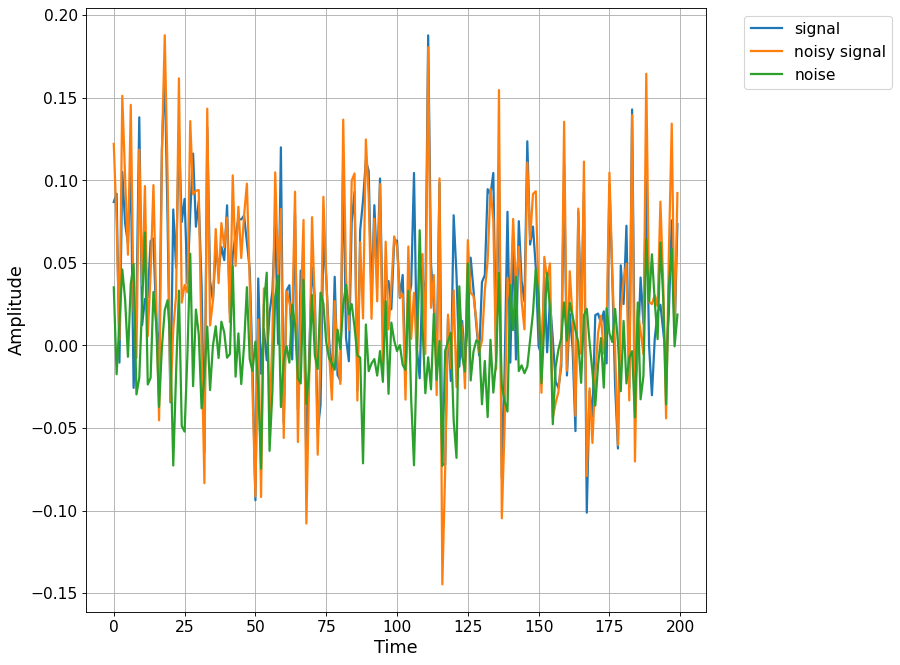

NameError: name 'dense_model' is not defined

In [7]:
## 10% signal to noise ratio
# %matplotlib
noise = np.random.normal(0, 0.03, (x_test.shape[0], x_test.shape[1]))
x_test_noise = x_test + noise

def SNR(signal, noise):
    powS = np.average(signal**2)
    powN = np.average(noise**2)
    return powS/powN

print(SNR(x_test, noise))

## plot the signal and noise and the noisy signal
fig = plt.figure(figsize=(10,10),dpi=80)
ax = fig.add_subplot(111)
ax.plot(x_test[0,:], linewidth=2)
ax.plot(x_test_noise[0,:], linewidth=2)
ax.plot(noise[0,:], linewidth=2)
ax.grid(True)
ax.set_ylabel('Amplitude', fontsize=16)
ax.set_xlabel('Time',fontsize=16)
ax.legend(['signal', 'noisy signal', 'noise'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## evaluate the model on the noisy signal
dense_model.evaluate(x_test_noise, y_test)


In [81]:
## Generate different snr ratios with different noise
for i in range(12):
    noise = np.random.normal(0, (i+1)/100, (x_test.shape[0], x_test.shape[1]))
    x_test_noise = x_test + noise
    print(f"Signal to Noise Ratio: {SNR(x_test, noise)}")

Signal to Noise Ratio: 194.9998986304628
Signal to Noise Ratio: 48.916215642717184
Signal to Noise Ratio: 21.71458852037207
Signal to Noise Ratio: 12.282912895452105
Signal to Noise Ratio: 7.85323455247782
Signal to Noise Ratio: 5.420848094877034
Signal to Noise Ratio: 3.9785877681967374
Signal to Noise Ratio: 3.0564115425742115
Signal to Noise Ratio: 2.4038929430383607
Signal to Noise Ratio: 1.937302920889509
Signal to Noise Ratio: 1.623551902689443
Signal to Noise Ratio: 1.350485507867207


In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Add random gaussian noise to the input data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)


train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=256)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu',input_shape=(2,min_len)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])


## Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True)



dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(train_dataset,validation_data=val_dataset, epochs=100,verbose=1,callbacks=[early_stopping])

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5),dpi=80)
ax = fig.add_subplot(111)
ax.plot(history.history['loss'], linewidth=2)
ax.plot(history.history['accuracy'],linewidth=2)
ax.plot(history.history['val_accuracy'],linewidth=2)
ax.plot(history.history['val_loss'],linewidth=2)
ax.grid(True)
ax.set_ylabel('Loss & Accuracy', fontsize=16)
ax.set_xlabel('Epoch',fontsize=16)
ax.legend(['training_loss', 'training_accuracy', 'val_accuracy', 'val_loss'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")

plt.show()

In [ ]:
dense_model.evaluate(x_test_noisy, y_test)

In [ ]:
## Read the dap_dml real world data
import pandas as pd
import numpy as np

df = pd.read_csv('dap_dml.csv')
df.head()

In [ ]:
## Create 2x100 array from dap and dml data and convert to numpy array
dap_ap_data = np.array(df[['dap_ap']].values)
dml_ap_data = np.array(df[['dml_ap']].values)
min_len = 300
dap_ap_data = dap_ap_data.reshape(int(dap_ap_data.shape[0]/min_len),1,min_len)
dml_ap_data = dml_ap_data.reshape(int(dml_ap_data.shape[0]/min_len),1,min_len)
ap_concat_data = np.concatenate((dap_ap_data,dml_ap_data),axis=1)
y_ap_concat_data = np.ones((ap_concat_data.shape[0],1))
## same thing for other labels
dap_ml_data = np.array(df[['dap_ml']].values)
dml_ml_data = np.array(df[['dml_ml']].values)
dap_ml_data = dap_ml_data.reshape(int(dap_ml_data.shape[0]/min_len),1,min_len)
dml_ml_data = dml_ml_data.reshape(int(dml_ml_data.shape[0]/min_len),1,min_len)
ml_concat_data = np.concatenate((dap_ml_data,dml_ml_data),axis=1)
y_ml_concat_data = np.ones((ml_concat_data.shape[0],1))*2

dap_standing_data = np.array(df[['dap_standing']].values)
dml_standing_data = np.array(df[['dml_standing']].values)
dap_standing_data = dap_standing_data.reshape(int(dap_standing_data.shape[0]/min_len),1,min_len)
dml_standing_data = dml_standing_data.reshape(int(dml_standing_data.shape[0]/min_len),1,min_len)
standing_concat_data = np.concatenate((dap_standing_data,dml_standing_data),axis=1)
y_standing_concat_data = np.ones((standing_concat_data.shape[0],1))*0

test_data = np.concatenate((ap_concat_data,ml_concat_data,standing_concat_data),axis=0)
y_test_data = np.concatenate((y_ap_concat_data,y_ml_concat_data,y_standing_concat_data),axis=0)
y_test_data = y_test_data.reshape(y_test_data.shape[0],)

In [ ]:
print(test_data.shape)
print(y_test_data.shape)

## shuffle test data
from sklearn.utils import shuffle
test_data, y_test_data = shuffle(test_data, y_test_data, random_state=0)


In [ ]:
## Normalize test data
test_data = test_data.astype('float32') / np.max(test_data)

predictions = dense_model.predict(test_data)
predictions = np.argmax(predictions,axis=1)
print(predictions.shape)
## confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test_data, predictions)
print(cm)
sns.heatmap(cm, annot=True, fmt='d')
classes = ['standing','ap','ml', 'instabile']
plt.xticks(np.arange(4)+0.5, classes, rotation=45)
plt.yticks(np.arange(4)+0.5, classes, rotation=45)
plt.show()

## classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_data, predictions, target_names=classes))
## ACCURACY
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_data, predictions))



### Try CNN Model

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Add random gaussian noise to the input data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)


train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_noisy, y_train))
train_dataset = (train_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val_noisy, y_val))
val_dataset = (val_dataset.shuffle(buffer_size=128)
                                .batch(BATCH_SIZE)
                                .prefetch(buffer_size=tf.data.AUTOTUNE))

model = tf.keras.Sequential(name='cnn_model')
model.add(tf.keras.layers.InputLayer(input_shape=(2,100)))
model.add(tf.keras.layers.Conv1D(8,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv1D(4,4, padding='same'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(12))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

print(model.summary())


## Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=200, validation_data=val_dataset, verbose=1, callbacks=[early_stopping])   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

0.9434482758620689
              precision    recall  f1-score   support

         0.0     0.9045    0.9783    0.9399       184
         1.0     0.9162    0.9371    0.9266       175
         2.0     0.9702    0.9209    0.9449       177
         3.0     0.9888    0.9365    0.9620       189

    accuracy                         0.9434       725
   macro avg     0.9449    0.9432    0.9433       725
weighted avg     0.9454    0.9434    0.9437       725



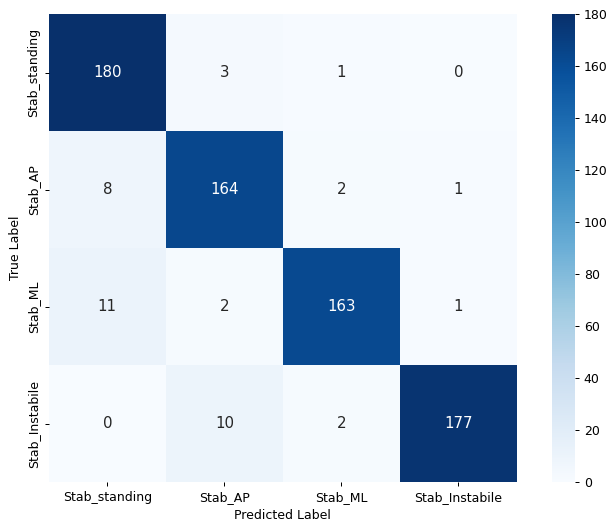

In [17]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_val_noisy = x_val + noise_factor * tf.random.normal(shape=x_val.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_train_data = x_train.reshape(x_train.shape[0], -1)
rf_val_data = x_val.reshape(x_val.shape[0], -1)
rf_test_data = x_test.reshape(x_test.shape[0], -1)
## Combine the training and validation data
rf_train_data = np.concatenate((rf_train_data, rf_val_data), axis=0)
rf_y_train = np.concatenate((y_train, y_val), axis=0)



rf_classifier.fit(rf_train_data, rf_y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = rf_classifier.predict(rf_test_data)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


0.9103448275862069
              precision    recall  f1-score   support

         0.0     0.8495    0.9511    0.8974       184
         1.0     0.8525    0.8914    0.8715       175
         2.0     0.9639    0.9040    0.9329       177
         3.0     0.9941    0.8942    0.9415       189

    accuracy                         0.9103       725
   macro avg     0.9150    0.9102    0.9108       725
weighted avg     0.9158    0.9103    0.9113       725



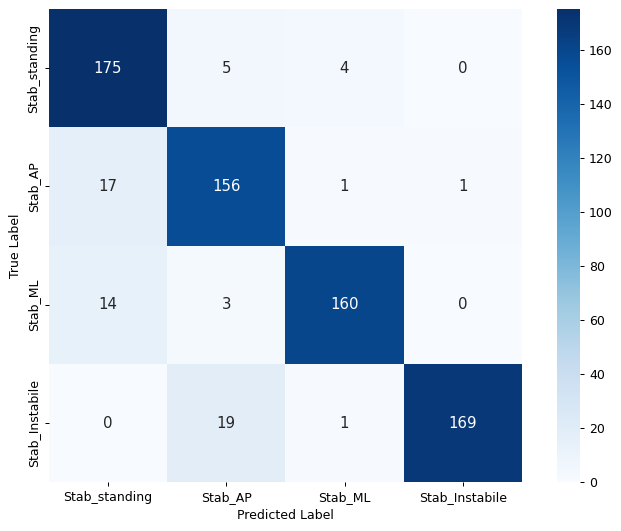

In [18]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()


from sklearn.ensemble import ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(
                      min_samples_split=3,
                      n_estimators=5,
                      bootstrap=True,
                      n_jobs=-1,
                      random_state=0,
                      max_features='sqrt')

rf_train_data = x_train.reshape(x_train.shape[0], -1)
rf_val_data = x_val.reshape(x_val.shape[0], -1)
rf_test_data = x_test.reshape(x_test.shape[0], -1)
## Combine the training and validation data
rf_train_data = np.concatenate((rf_train_data, rf_val_data), axis=0)
rf_y_train = np.concatenate((y_train, y_val), axis=0)



et_classifier.fit(rf_train_data, rf_y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = et_classifier.predict(rf_test_data)
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
plt.figure(figsize=(8,6), dpi=90)

ax=plt.subplot(111)
# plt.title("Confusion Matrix", fontsize=15)
labels = classes
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=True, annot_kws={"size": 12},ax=ax, square=True)
ax.set_xticklabels(labels, fontsize=10)
ax.set_yticklabels(labels, fontsize=10)
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_ylabel("True Label", fontsize=10)
# ax.patch.set_edgecolor('black')
# ax.patch.set_linewidth('2')
plt.tight_layout()
import sklearn.metrics as metrics

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred,digits=4))


In [19]:
# Support Vector Machine (SVM)
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split, cross_val_score
svm_train_data = x_train.reshape(x_train.shape[0], -1)
svm_val_data = x_val.reshape(x_val.shape[0], -1)
svm_test_data = x_test.reshape(x_test.shape[0], -1)
## concatenate train and validation data
svm_train_data = np.concatenate((svm_train_data, svm_val_data), axis=0)
svm_y_train = np.concatenate((y_train, y_val), axis=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(C=10, kernel = 'rbf', random_state = 0)
classifier.fit(svm_train_data, svm_y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, svm_train_data, svm_y_train, cv=10)
print(scores,scores.mean())

import joblib
# Save the model as a pickle in a file
joblib.dump(classifier, 'SVM.pkl') 
# Load the pickled model
Test_Classifier = joblib.load('SVM.pkl') 

# Predicting the Test set results
y_pred = Test_Classifier.predict(svm_test_data)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("The accuracy of the model is  {} %".format(str(round(accuracy_score(y_test,y_pred),4)*100)))

[0.97080292 0.99756691 0.98053528 0.97080292 0.98053528 0.97323601
 0.98540146 0.97317073 0.98292683 0.97317073] 0.9788149071271735
[[184   0   0   0]
 [  2 172   1   0]
 [  5   0 172   0]
 [  0   2   1 186]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       184
         1.0       0.99      0.98      0.99       175
         2.0       0.99      0.97      0.98       177
         3.0       1.00      0.98      0.99       189

    accuracy                           0.98       725
   macro avg       0.99      0.98      0.98       725
weighted avg       0.99      0.98      0.98       725

The accuracy of the model is  98.48 %


### Combine SVM, RF and MLP for classification

23/23 [==============================] - 0s 483us/step


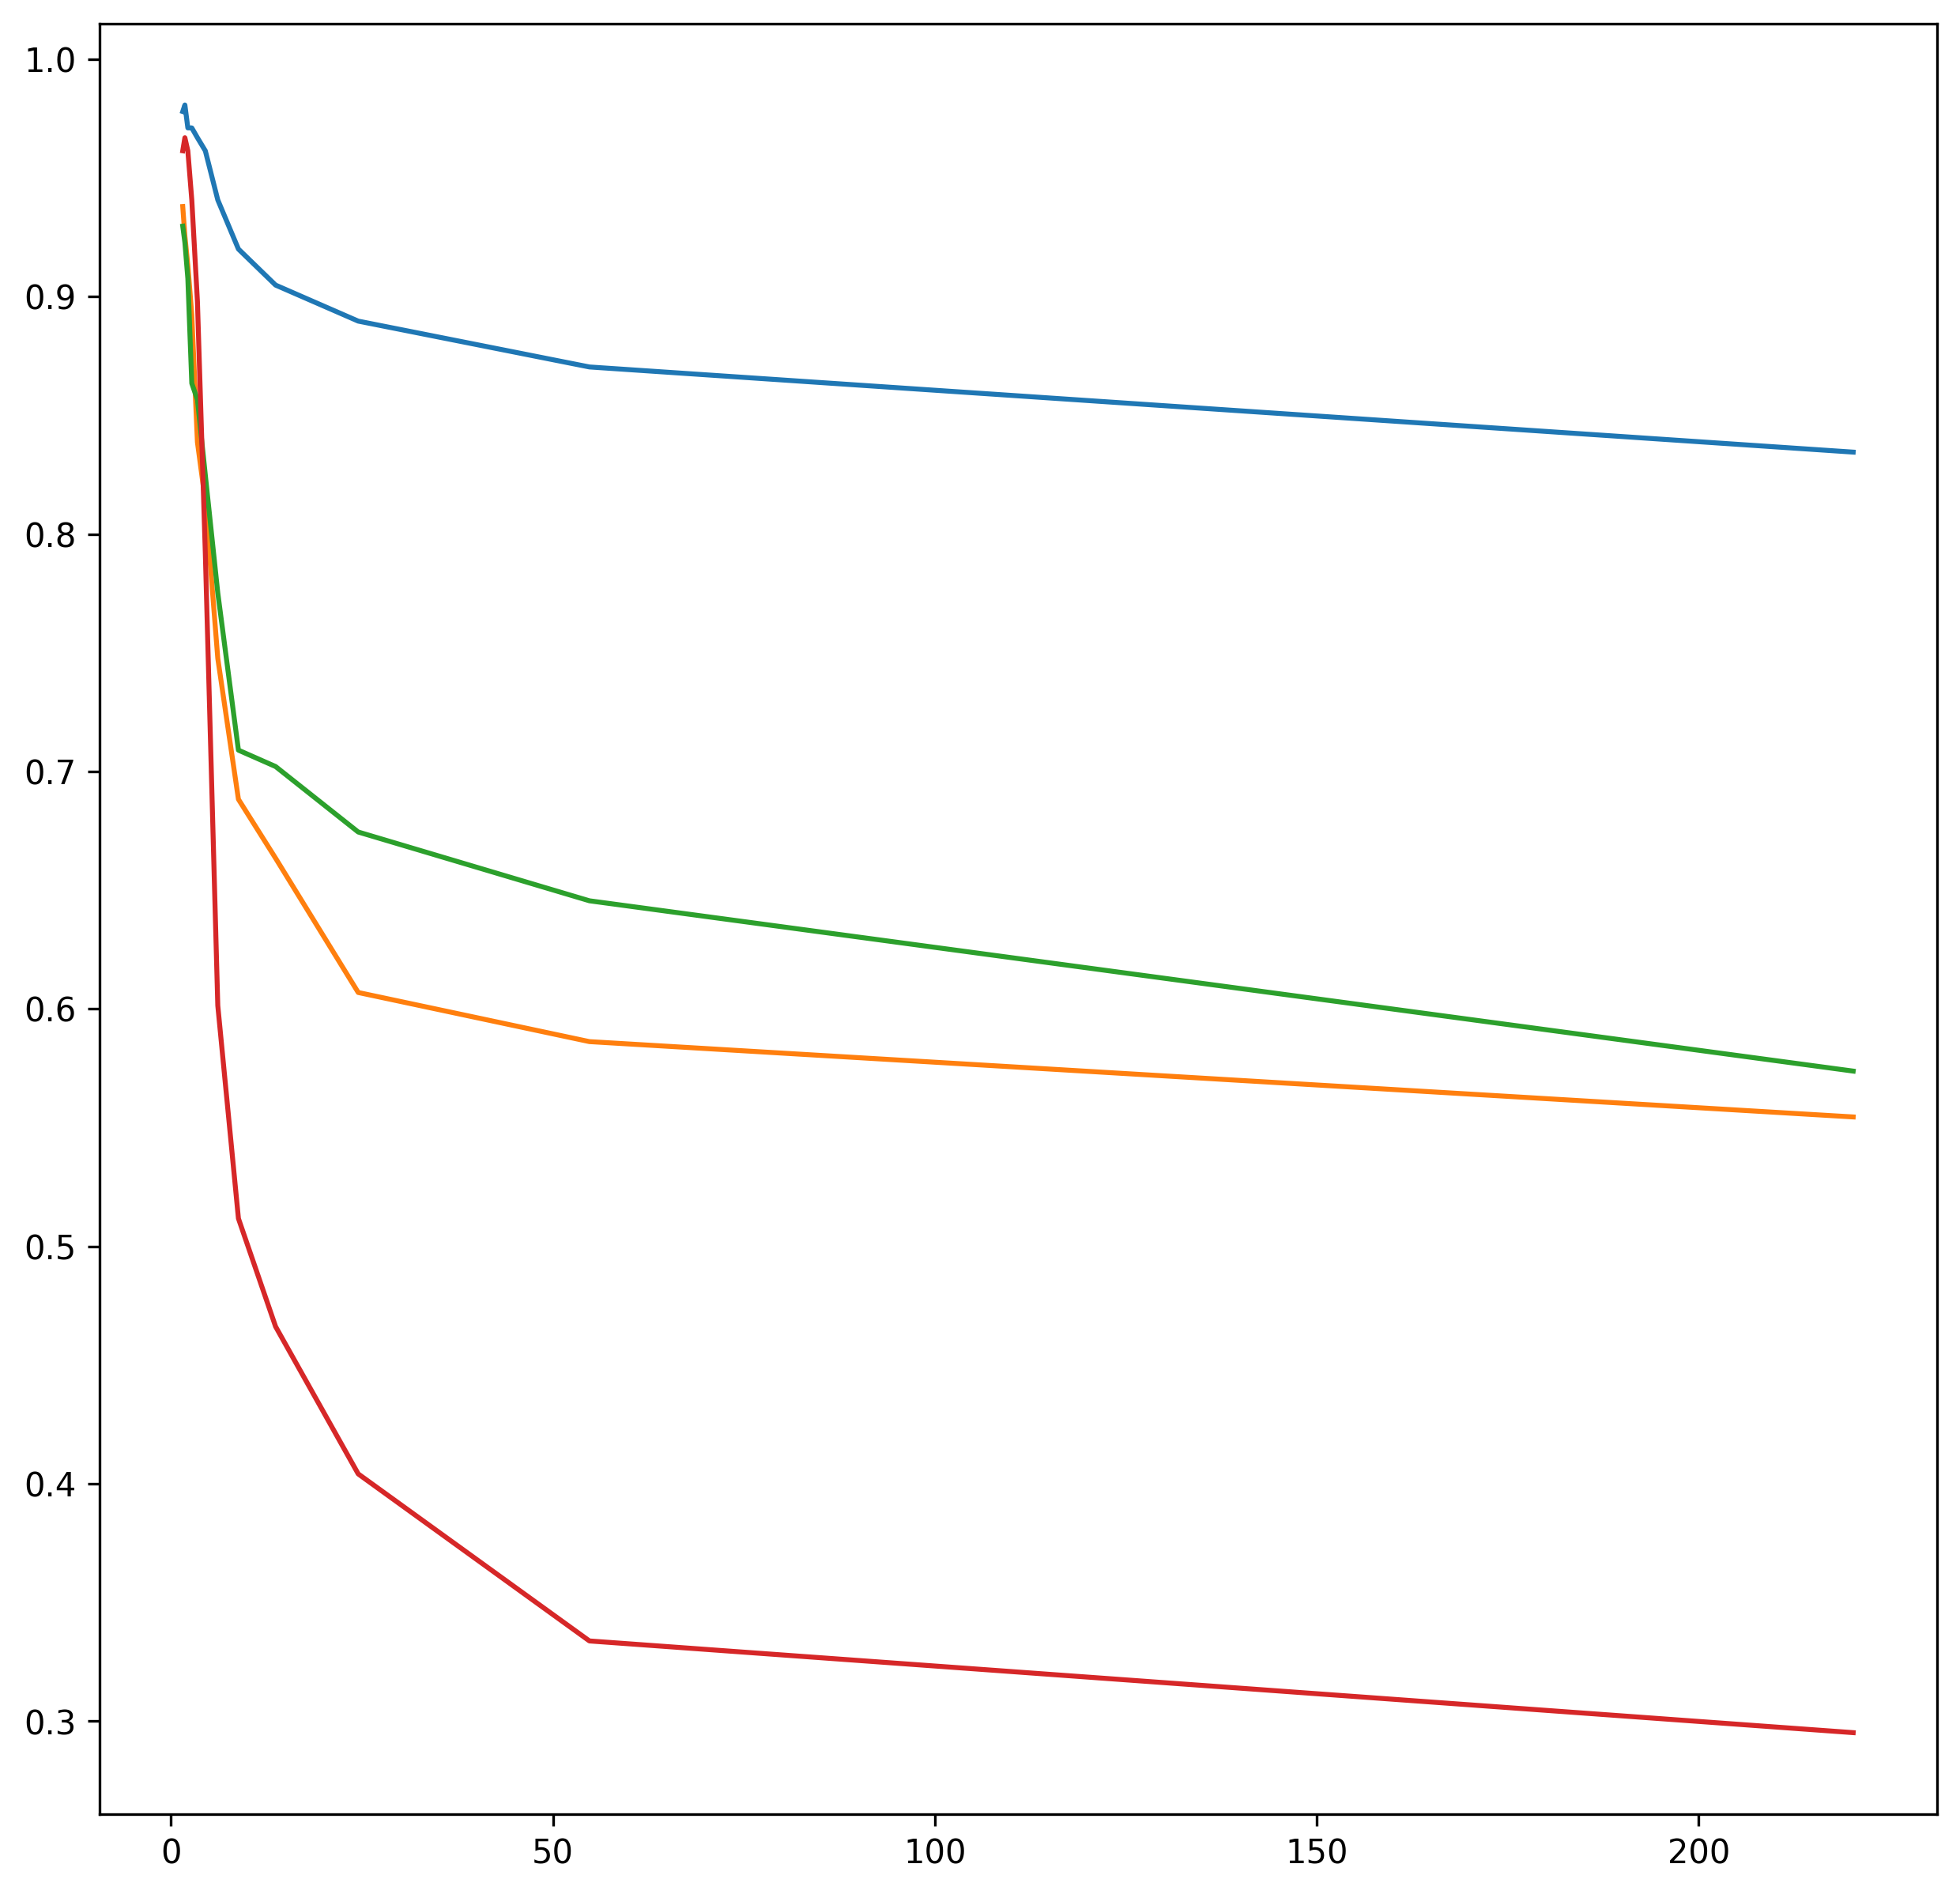

In [8]:
## Add random gaussian noise to the input data starting from 0 to 0.1 and test the model
# %matplotlib
def add_noise(x, noise_factor):
    x = x + noise_factor * tf.random.normal(shape=x.shape)
    return x
noises=[]
mlp_losses=[]
mlp_accuracies=[]
rf_losses=[]
rf_accuracies=[]
et_losses=[]
et_accuracies=[]
gnb_losses=[]
gnb_accuracies=[]
snr_values=[]
for i in range(12):
    noise = np.random.normal(0, (i+1)/100, (x_test.shape[0], x_test.shape[1]))
    noisy_x_test = x_test + noise
    x, test_acc = dense_model_100.evaluate(noisy_x_test, y_test)
    y_pred = dense_model_100.predict(noisy_x_test)
    y_pred = np.argmax(y_pred, axis=1)
    test_loss = metrics.hamming_loss(y_test, y_pred)
    noises.append(i/100)
    mlp_losses.append(test_loss)
    mlp_accuracies.append(test_acc)

    noisy_rf_test_data = noisy_x_test
    y_pred = rf_classifier.predict(noisy_rf_test_data)
    loss_rf = metrics.hamming_loss(y_test, y_pred)
    rf_losses.append(loss_rf)
    rf_accuracies.append(metrics.accuracy_score(y_test, y_pred))

    y_pred = et_classifier.predict(noisy_rf_test_data)
    loss_et = metrics.hamming_loss(y_test, y_pred)
    et_losses.append(loss_et)
    et_accuracies.append(metrics.accuracy_score(y_test, y_pred))

    y_pred = gnb.predict(noisy_rf_test_data)
    loss_gnb = metrics.hamming_loss(y_test, y_pred)
    gnb_losses.append(loss_gnb)
    gnb_accuracies.append(metrics.accuracy_score(y_test, y_pred))
    snr_values.append(SNR(x_test, noise))

## Reverse snr values
snr_values = snr_values[::-1]

noises = snr_values
## reverse the losses and accuracies
# mlp_losses = mlp_losses[::-1]
# mlp_accuracies = mlp_accuracies[::-1]
# rf_losses = rf_losses[::-1]
# rf_accuracies = rf_accuracies[::-1]
# et_losses = et_losses[::-1]
# et_accuracies = et_accuracies[::-1]
# gnb_losses = gnb_losses[::-1]
# gnb_accuracies = gnb_accuracies[::-1]

# Plot the results in subplots
fig = plt.figure(figsize=(10, 10), dpi=300)
plt.plot(noises, mlp_accuracies, label='MLP')
plt.plot(noises, rf_accuracies, label='RF')
plt.plot(noises, et_accuracies, label='ET')
plt.plot(noises, gnb_accuracies, label='GNB')

plt.show()

In [10]:
mlp_accuracies[0] = 0.9903
rf_accuracies[0] = 0.9929
et_accuracies[0] = 0.9944
gnb_accuracies[0] =0.9876
## Plot all accuracies of the models


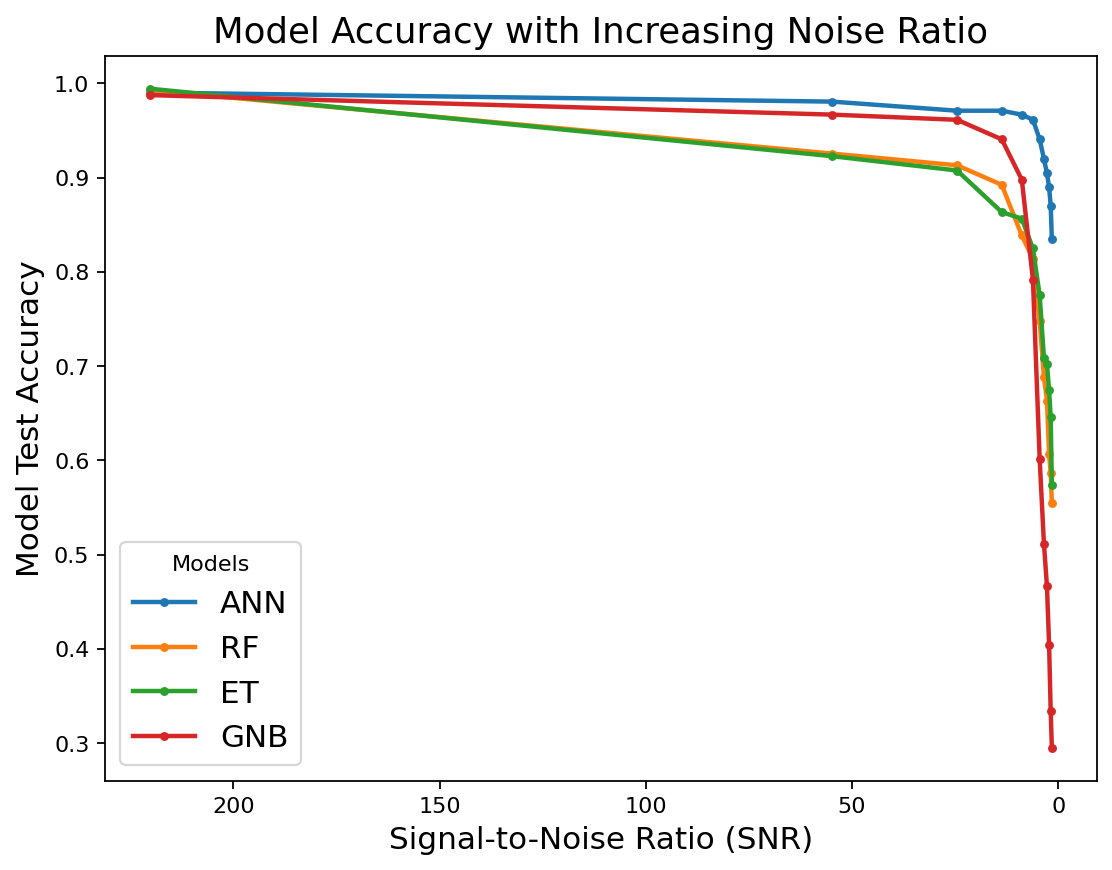

In [11]:
noises = snr_values[::-1]
fig = plt.figure(figsize=(8, 6), dpi=160)
plt.plot(noises, mlp_accuracies, label='ANN', marker='.', linewidth=2)
plt.plot(noises, rf_accuracies, label='RF', marker='.', linewidth=2)
plt.plot(noises, et_accuracies, label='ET', marker='.', linewidth=2)
plt.plot(noises, gnb_accuracies, label='GNB', marker='.', linewidth=2)
plt.legend(title='Models', loc='best', fontsize=14)
plt.title('Model Accuracy with Increasing Noise Ratio', fontsize=16)
plt.xlabel('Signal-to-Noise Ratio (SNR)',fontsize=14)
plt.ylabel('Model Test Accuracy',fontsize=14)
plt.gca().invert_xaxis()

# plt.xlim(max(noises), min(noises))
plt.show()

### Plot the accuracy and losses of the each model

In [35]:
### Prepare same plot using plotly
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=noises, y=mlp_losses,
                    mode='lines+markers',  
                    name='MLP'))
fig.add_trace(go.Scatter(x=noises, y=rf_losses,
                    mode='lines+markers',  
                    name='RF'))
fig.add_trace(go.Scatter(x=noises, y=gnb_losses,   
                    mode='lines+markers',
                    name='SVM'))
fig.add_trace(go.Scatter(x=noises, y=et_losses,
                     mode='lines+markers',
                     name='ET'))

fig.update_layout(title='Loss vs Noise',
                     xaxis_title='Noise',
                        yaxis_title='Loss')
fig.update_layout(template='plotly_dark')
fig.show()
fig = go.Figure()
fig.add_trace(go.Scatter(x=noises, y=mlp_accuracies,
                    mode='lines+markers',
                    name='MLP'))
fig.add_trace(go.Scatter(x=noises, y=rf_accuracies,
                    mode='lines+markers',
                    name='RF'))
fig.add_trace(go.Scatter(x=noises, y=gnb_accuracies,
                    mode='lines+markers',
                    name='SVM'))
fig.add_trace(go.Scatter(x=noises, y=et_accuracies,
                     mode='lines+markers',
                     name='ET'))

fig.update_layout(title='Accuracy vs Noise',
                        xaxis_title='Noise',
                        yaxis_title='Accuracy')
## Change the theme to plotly_dark
fig.update_layout(template='plotly_dark')

fig.show()
